In [2]:
import os
import pandas as pd
import zipfile

In [3]:
Dataset = 'titanic'

with zipfile.ZipFile('./data_zip/' + Dataset + ".zip", "r") as z:
    z.extractall(".")

In [4]:
train = pd.read_csv('./Titanic/train.csv')
test = pd.read_csv('./Titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId: 승객 ID (unique 한 번호)
- Survived: 살아남았는지를 나타냄 - 0 = No, 1 = Yes (범주형)
- pclass: #등석 - 1 = 1st, 2 = 2nd, 3 = 3rd  	(범주형)
- sibsp: #명의 형제자매/와이프와 동승했는지를 나타냄  (형제자매/와이프가 동승하지 않았으면 0) (수치형)
- parch: #명의 부모/아이와 동승했는지를 나타냄 (부모/아이가 동승하지 않았으면 0) (수치형)
- ticket: 티켓번호 (수치x, 범주x)
- cabin: 선실번호 (짐을 어디다 놓았는지) (수치x, 범주x)
- embarked:	어느 항구에서 탔는지를 나타냄 - C = Cherbourg, Q = Queenstown, S = Southampton (범주형)

In [7]:
test.head() #survived를 예측하는 것임.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape, test.shape

((891, 12), (418, 11))

In [9]:
train.info() #Age: 714, Cabin: 204, Embarked: 889 <- null값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info() # Age: 332, Fare: 417, Cabin: 91

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
train.isnull().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Age: 177개의 NUll값,(20%) Cabin: 687개의 Null값(77%)

In [17]:
test.isnull().sum() / test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Age: 86개의 Null값, (20 %)  Cabin: 327개의 Null값 (78%) -> Cabin의 경우는 제거하는 것이 좋을듯.

### 수치형 데이터 탐색(1)

In [18]:
# 수치형 데이터에 대한 describe() 살펴보기.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Sibsp: min:0, 1분위수: 0, 2분위수: 1, 3분위수:1, (최대: 8 -> 이상치 데이터)
Parch: min:0, 1분위수: 0, 2분위수: 0, 3분위수:0, (최대: 6 -> 이상치 데이터.)
**Age: min:0.42 를 통해, 이는 개월 수를 수치화 한것임.**
- Age: min: 4개월, 1분위수:20살, 2분위수: 28살, 3분위수: 38살, max: 80살
Fare: min:0, 1분위수: 8, 2분위수: 14.4, 3분위수: 31, max: 512

In [19]:
train.loc[train['Age'] < 1 ] # 1년 미만 0.83 (8개월)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [20]:
cond = (train['Age'] >= 1) & (train['Age'] < 2)
train.loc[cond] # age가 1살인 경우: 12명.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C


In [28]:
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
import matplotlib.pyplot as plt

### 수치형 데이터 시각화 (히스토그램, kdeplot)

C:\Users\minsu\AppData\Local\Temp\ipykernel_2844\4132553259.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

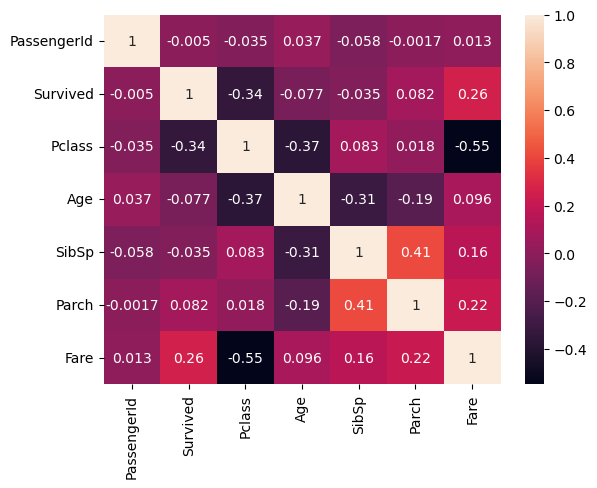

In [26]:
sns.heatmap(train.corr(), annot=True)

In [27]:
train.corr().iplot(kind='heatmap', colorscale='Blues')

C:\Users\minsu\AppData\Local\Temp\ipykernel_2844\2271653123.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



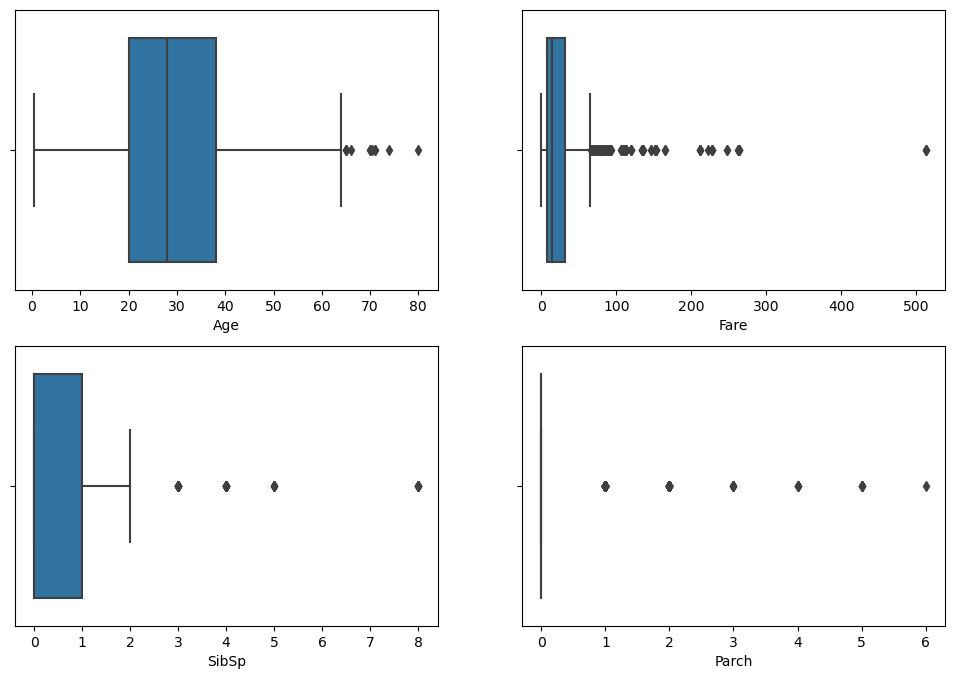

In [30]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=train, x='Age')
plt.subplot(2, 2, 2)
sns.boxplot(data=train, x='Fare')
plt.subplot(2, 2, 3)
sns.boxplot(data=train, x='SibSp')
plt.subplot(2, 2, 4)
sns.boxplot(data=train, x='Parch')
plt.show()

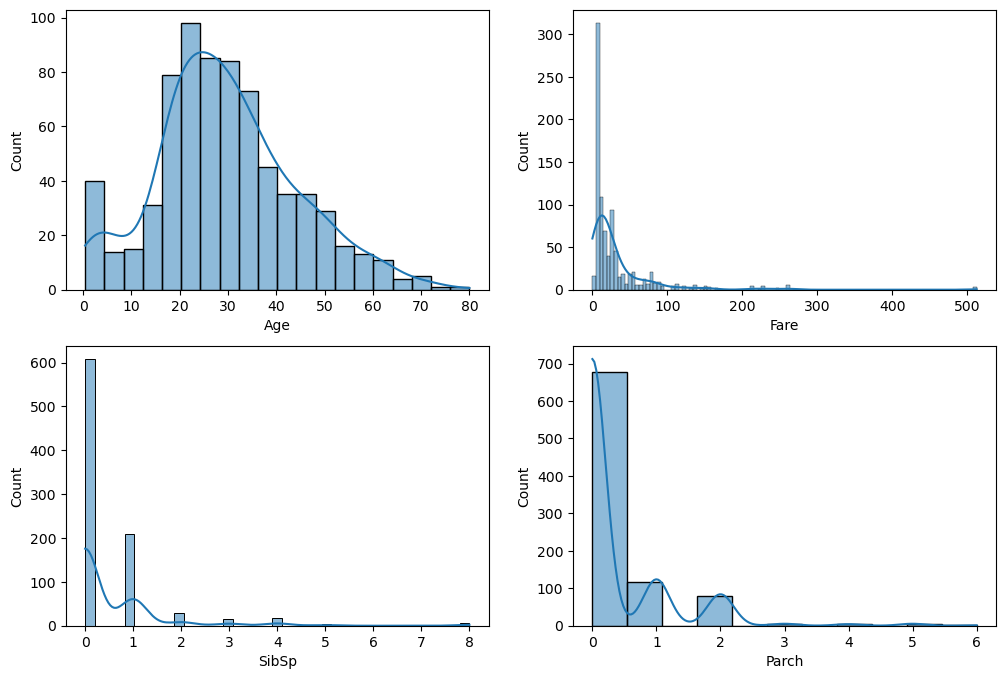

In [31]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=train, x='Age', kde=True)
plt.subplot(2, 2, 2)
sns.histplot(data=train, x='Fare', kde=True)
plt.subplot(2, 2, 3)
sns.histplot(data=train, x='SibSp', kde=True)
plt.subplot(2, 2, 4)
sns.histplot(data=train, x='Parch', kde=True)
plt.show()

### 범주형 데이터 시각화 (countplot: 카테코리 별 개수 확인)

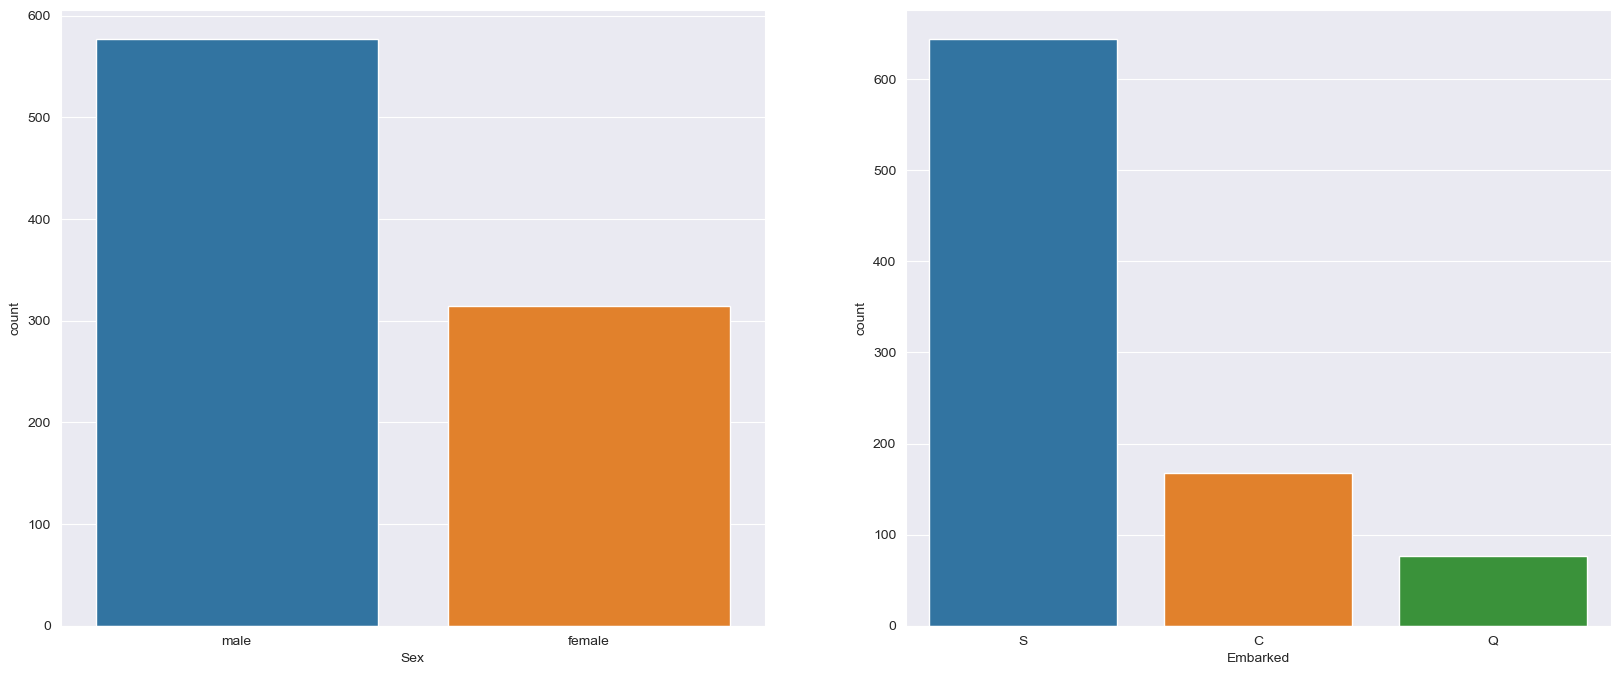

In [28]:
# sex, embarked
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=train)
plt.subplot(1, 2, 2)
sns.countplot(x='Embarked', data=train)
plt.show()

### 수치형 데이터 탐색(2)
- x -> y(survived)의 관계 살펴보기

### 1. 범주형 X --> Y(범주형)

In [13]:
from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
train.info() #name, Sex, Ticket, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Sex -> Survived 관계

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


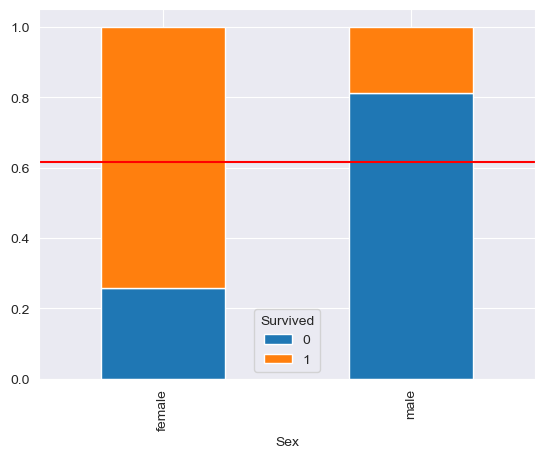

Survived    0    1
Sex               
female     81  233
male      468  109
--------------------------------------------------


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [21]:
target = 'Survived'
temp = pd.crosstab(train['Sex'], train[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-train['Survived'].mean(), color = 'r')
plt.show()

table = pd.crosstab(train['Sex'], train[target])
print(table)
print('-' * 50)
# 2) 카이제곱검정
spst.chi2_contingency(table)

Embarked와 Survived 관계

Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


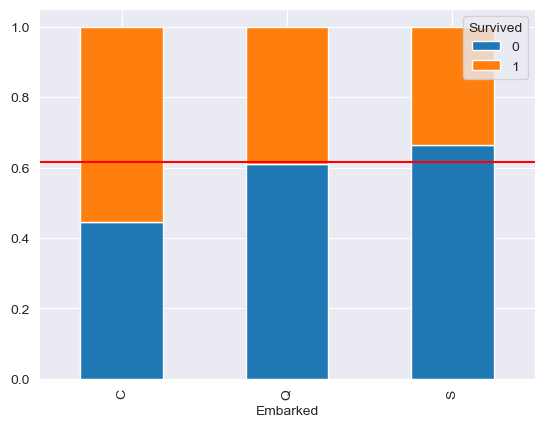

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
--------------------------------------------------


(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  64.2519685],
        [ 47.5511811,  29.4488189],
        [397.7007874, 246.2992126]]))

In [24]:
target = 'Survived'
temp = pd.crosstab(train['Embarked'], train[target], normalize = 'index')
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-train['Survived'].mean(), color = 'r')
plt.show()

table = pd.crosstab(train['Embarked'], train[target])
print(table)
print('-' * 50)
# 2) 카이제곱검정
spst.chi2_contingency(table)

### 2. X(숫자형) -> Y(범주형)의 관계